In [6]:
#Import statements.

import numpy as np
import pandas as pd

In [8]:
# READING FILE DATA

data = pd.read_csv("student_data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
#  Find correlations between various features and grade_mean and see which features have a significant impact on it.

# data_G1 = data["G1"]

data['Average_Grades'] = data[['G1', 'G2', 'G3']].mean(axis = 1)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades,Average_Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,8.666667


In [21]:
data.corr().head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades,Average_Grades
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.134589,-0.134589
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.224260,0.224260
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175852,0.175852
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.128197,-0.128197
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134565,0.134565


In [38]:
# Find out got better grades (Boys or Girls).
based_on_gender = data.groupby("sex")
based_on_gender.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades,Average_Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,8.666667
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,15.000000,15.000000
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,11.666667,11.666667
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,17.666667,17.666667
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,14.666667,14.666667
12,GP,M,15,U,LE3,T,4,4,health,services,...,3,1,3,5,2,14,14,14,14.000000,14.000000


In [39]:
# Similarly Find out who got better grades age wise.
grades_age_wise = data.groupby("age")
grades_age_wise.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades,Average_Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,8.666667
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,15.000000,15.000000
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,11.666667,11.666667
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.666667,5.666667
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,17.666667,17.666667
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,14.666667,14.666667


In [32]:
# Label encode all other columns.
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades,Average_Grades
0,0,0,3,1,0,0,4,4,0,4,...,3,0,0,2,6,2,3,3,13,13
1,0,0,2,1,0,1,1,1,0,2,...,2,0,0,2,4,2,2,3,12,12
2,0,0,0,1,1,1,1,1,0,2,...,1,1,2,2,10,4,5,7,21,21
3,0,0,0,1,0,1,4,2,1,3,...,1,0,0,4,2,12,11,12,40,40
4,0,0,1,1,0,1,3,3,2,2,...,1,0,1,4,4,3,7,7,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,5,1,1,0,2,2,3,3,...,3,3,4,3,11,6,6,6,23,23
391,1,1,2,1,1,1,3,1,3,3,...,4,2,3,1,3,11,13,13,42,42
392,1,1,6,0,0,1,1,1,2,2,...,2,2,2,2,3,7,5,4,21,21
393,1,1,3,0,1,1,3,2,3,2,...,0,2,3,4,0,8,9,7,29,29


In [47]:
# Count the number of distinct values in each column and drop column with very high distinct values.
print(data.nunique())

# Dropping column with high distinct values....
data.drop('Average_Grades',axis = 1)

school             2
sex                2
age                8
address            2
famsize            2
Pstatus            2
Medu               5
Fedu               5
Mjob               5
Fjob               5
reason             4
guardian           3
traveltime         4
studytime          4
failures           4
schoolsup          2
famsup             2
paid               2
activities         2
nursery            2
higher             2
internet           2
romantic           2
famrel             5
freetime           5
goout              5
Dalc               5
Walc               5
health             5
absences          34
G1                17
G2                17
G3                18
avg_grades        54
Average_Grades    54
dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [49]:
# Replace any missing value of each column by most frequent value having same Grade mean value.

#Since here there is no missing value in the data therefore first calculate missing data percentage.
missing_data_percentage = data.isnull().sum()/len(data) * 100
# Missing percentage for all column data..... 
print(missing_data_percentage)

school            0.0
sex               0.0
age               0.0
address           0.0
famsize           0.0
Pstatus           0.0
Medu              0.0
Fedu              0.0
Mjob              0.0
Fjob              0.0
reason            0.0
guardian          0.0
traveltime        0.0
studytime         0.0
failures          0.0
schoolsup         0.0
famsup            0.0
paid              0.0
activities        0.0
nursery           0.0
higher            0.0
internet          0.0
romantic          0.0
famrel            0.0
freetime          0.0
goout             0.0
Dalc              0.0
Walc              0.0
health            0.0
absences          0.0
G1                0.0
G2                0.0
G3                0.0
avg_grades        0.0
Average_Grades    0.0
dtype: float64


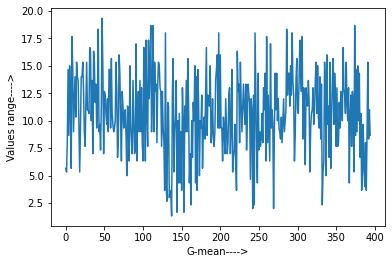

In [55]:
# Plot G-Mean vs top 4 correlated atributes in sible plot using subplots.
import matplotlib.pyplot as plt
%matplotlib inline

G_mean = data[['G1', 'G2', 'G3']].mean(axis = 1)
plt.xlabel('G-mean---->')
plt.ylabel('Values range---->')
plt.plot(G_mean)